<a href="https://colab.research.google.com/github/CaroLapid/Training-Example-Datasets/blob/main/Proyectos_parte_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Librerias & Google Drive

Para empezar carguemos esas librerias que nos hacen falta

In [70]:
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

Incorporamos la carpeta de Google Drive para poder "guardar" nuestros modelos

1. Abrir barra lateral de Carpeta
2.  Hacer click en carpeta con logo de Google Drive


In [ ]:
# Aquí iria el codigo para conectarse a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Proyecto 8

In [150]:
#Proyecto 8
img_rows, img_cols , channels= 32,32,3

model = ks.Sequential()
model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu', 
                           padding='same', input_shape=(32,32,3)))
model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu', 
                           padding='same', input_shape=(32,32,3)))

model.add(ks.layers.MaxPooling2D((2, 2)))

model.add(Dropout(0.25))

model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu', 
                           padding='same', input_shape=(32,32,3)))
model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu', 
                           padding='same', input_shape=(32,32,3)))

model.add(ks.layers.MaxPooling2D((2, 2)))

model.add(Dropout(0.25))

model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu', 
                           padding='same', input_shape=(32,32,3)))
model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu', 
                           padding='same', input_shape=(32,32,3)))

model.add(ks.layers.MaxPooling2D((2, 2)))

model.add(Dropout(0.25))

model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu', 
                           padding='same', input_shape=(32,32,3)))
model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu', 
                           padding='same', input_shape=(32,32,3)))

model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(ks.layers.Flatten())
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(32, activation='relu')) 
model.add(Dropout(0.25))

model.add(ks.layers.Dense(10, activation='softmax'))

## 2. Arquitectura de red del modelo


In [151]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_81 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_50 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_82 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_83 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

## 3. Optimizador, función error


In [152]:
from tensorflow.keras.optimizers import Adam

In [153]:
new_adam = Adam(learning_rate=0.001) 

In [154]:
model.compile(optimizer=new_adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4. Preparamos los datos

Cargamos los datos de CIFAR10 de los datasets directamente de las librerias de Keras. Estos ya estan dispuestos en train and test

**Detalle importante:** 
> La red neuronal requiere que los inputs sean números reales, y lo haremos forzando la division de los valores de dentro de las matrices 28x28 (que tienen valoress del 0 al 255) por 255.0 (un real)

##DATA AUGMENTATION


In [156]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_scaled, x_test_scaled = x_train / 255.0, x_test / 255.0

In [165]:
from keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator 
datagen = train_datagen = ImageDataGenerator( 
    rescale = 1./255, # Esto es porque queremos que las imagenes orignales se escalen por 255
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    data_format='channels_last'
)
train_generator = train_datagen.flow(
    x_train,  
    y_train, 
    batch_size=512
)


ValueError: ignored

In [157]:
print("Etiquetas de train:", y_train)


# Convertir los datos en arrays de una dimension (vectores) es una buena mejora en el dataset
y_train = y_train.ravel()
y_test = y_test.ravel()


print("Etiquetas de train (en vector):", y_train)


Etiquetas de train: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
Etiquetas de train (en vector): [6 9 9 ... 9 1 1]


Obtenemos un array con todas las labels de CIFAR10

In [158]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck'
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Pintemos una muestra de las imagenes del dataset CIFAR10, a ver si se parece en algo a lo que esperamos.
Primero, vemos que tipos de datos tengo, después mapeamos esas matrices en una escala de grises utilizando el método **.get_cmap()** de PlotLy con los nueve primeros números del dataset.

Train: X=(50000, 32, 32, 3), y=(50000,)
Test: X=(10000, 32, 32, 3), y=(10000,)


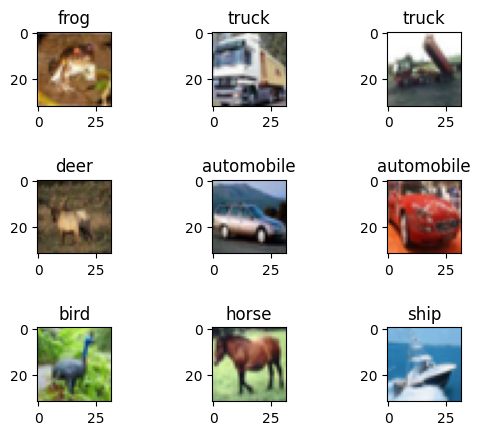

In [159]:
# Pintemos una muestra de las las imagenes del dataset MNIST

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train[i]])

plt.subplots_adjust(hspace = 1)
plt.show()

Como vamos a querer ir haciendo validación a la vez que entrenamos (muy practico)

In [160]:
x_val_scaled = x_train_scaled[-10000:]
y_val = y_train[-10000:]

x_train_scaled = x_train_scaled[:-10000]
y_train = y_train[:-10000]

Cuando añadimos convoluciones, necesitamos "pre-tratar los datos", porque **la convolución espera una matriz de 4 campos** (más parecido a "imagenes"), en el caso de MNIST. CIFAR10 ya tiene el shape adecuado, así que no tenemos que hacer nada, pero como siempre decimos: es mejor que comprobeis su tamaño.

Por eso, al salir de la Convolution, hay que hacer un Flatten, porque las capas FullDense esperan arrays, no matrices!!

Luego lo imprimimos para ver que todo está correcto

In [161]:
# Validamos el resultado
print('Train: X=%s, y=%s' % (x_train_scaled.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test_scaled.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val_scaled.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000,)
Test: X=(10000, 32, 32, 3), y=(10000,)
Validation: X=(10000, 32, 32, 3), y=(10000,)


##EARLY STOPPING

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystopping_accuracy = EarlyStopping(monitor = 'val_accuracy',patience=5)

In [ ]:
earlystopping_loss = EarlyStopping(monitor = 'val_loss',patience=5)

In [162]:
# Entrena el modelo usando el generador de datos
history = model.fit(train_generator, datagen.flow(x_train_scaled, y_train, batch_size=512),
                              steps_per_epoch=len(x_train_scaled) // 512,
                              epochs=40,
                              validation_data=(x_val_scaled, y_val))

<ipython-input-162-6d748433e292>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train_scaled, y_train, batch_size=512),


Epoch 1/40
78/78 [==============================] - 27s 294ms/step - loss: 2.1708 - accuracy: 0.1767 - val_loss: 1.9277 - val_accuracy: 0.2604
Epoch 2/40
78/78 [==============================] - 22s 288ms/step - loss: 1.8988 - accuracy: 0.2900 - val_loss: 1.7161 - val_accuracy: 0.3710
Epoch 3/40
78/78 [==============================] - 21s 272ms/step - loss: 1.7037 - accuracy: 0.3693 - val_loss: 1.4934 - val_accuracy: 0.4480
Epoch 4/40
78/78 [==============================] - 24s 308ms/step - loss: 1.5834 - accuracy: 0.4200 - val_loss: 1.4519 - val_accuracy: 0.4623
Epoch 5/40
78/78 [==============================] - 22s 279ms/step - loss: 1.4657 - accuracy: 0.4652 - val_loss: 1.3700 - val_accuracy: 0.5057
Epoch 6/40
78/78 [==============================] - 23s 294ms/step - loss: 1.3980 - accuracy: 0.4923 - val_loss: 1.4005 - val_accuracy: 0.5005
Epoch 7/40
78/78 [==============================] - 21s 263ms/step - loss: 1.3328 - accuracy: 0.5210 - val_loss: 1.1516 - val_accuracy: 0.5813

In [ ]:
t = time.perf_counter()

In [ ]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:01:34.554969


## 6. Evaluamos los resultados

Obtengamos una grafica de como el error y la accuracy van evolucionando en cada epoch en los datos de entrenamiento y en la validación

In [163]:
_, acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 77.330


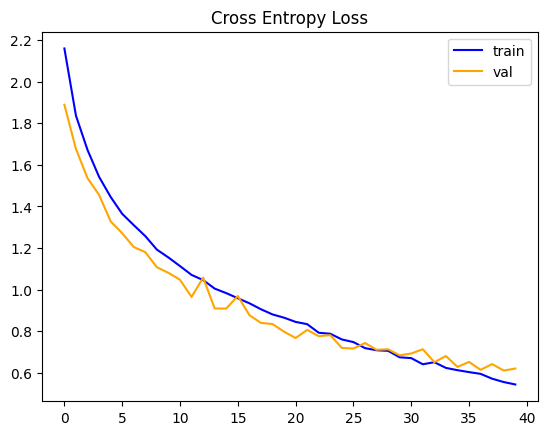

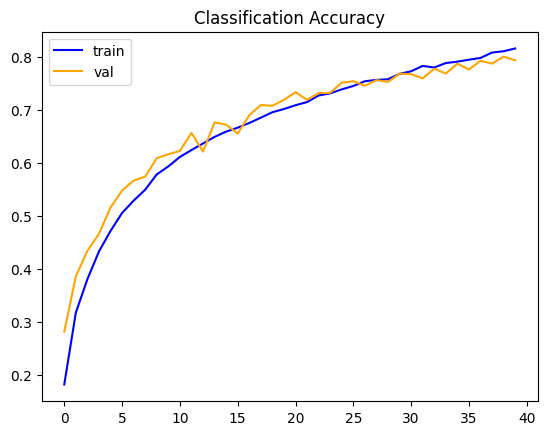

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

El coste podemos ver que es estable y es en el epoch 15 que se fija en un valor. Además la accuracy baila alrededor de 0.10. No se puede decir que sea un modelo muy bueno.

Veamos que tipo de predicciones estoy obteniendo sobre el conjunto de test (vamos a pintar las imagenes y sus clasificaciones)

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Una de las ventajas de Python es que hay montones de funciones y código realizado por terceras personas. Aquí me he fusilado unas bonitas funciones (que he adaptado un poco a mis necesidades) para poder pintar las imagenes, su label (ground truth) y las clasificaciones que hemos realizado.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Dibujamos las primeras imagenes, con las predicciones y sus valores reales (un total de 20 imagenes, para no abusar de vuestros laptops)

Coloreamos las prediciones correctas en azul y los fallos en rojo. Aunque primero he impreso las etiquetas para que tengamos una referencia al grafico.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


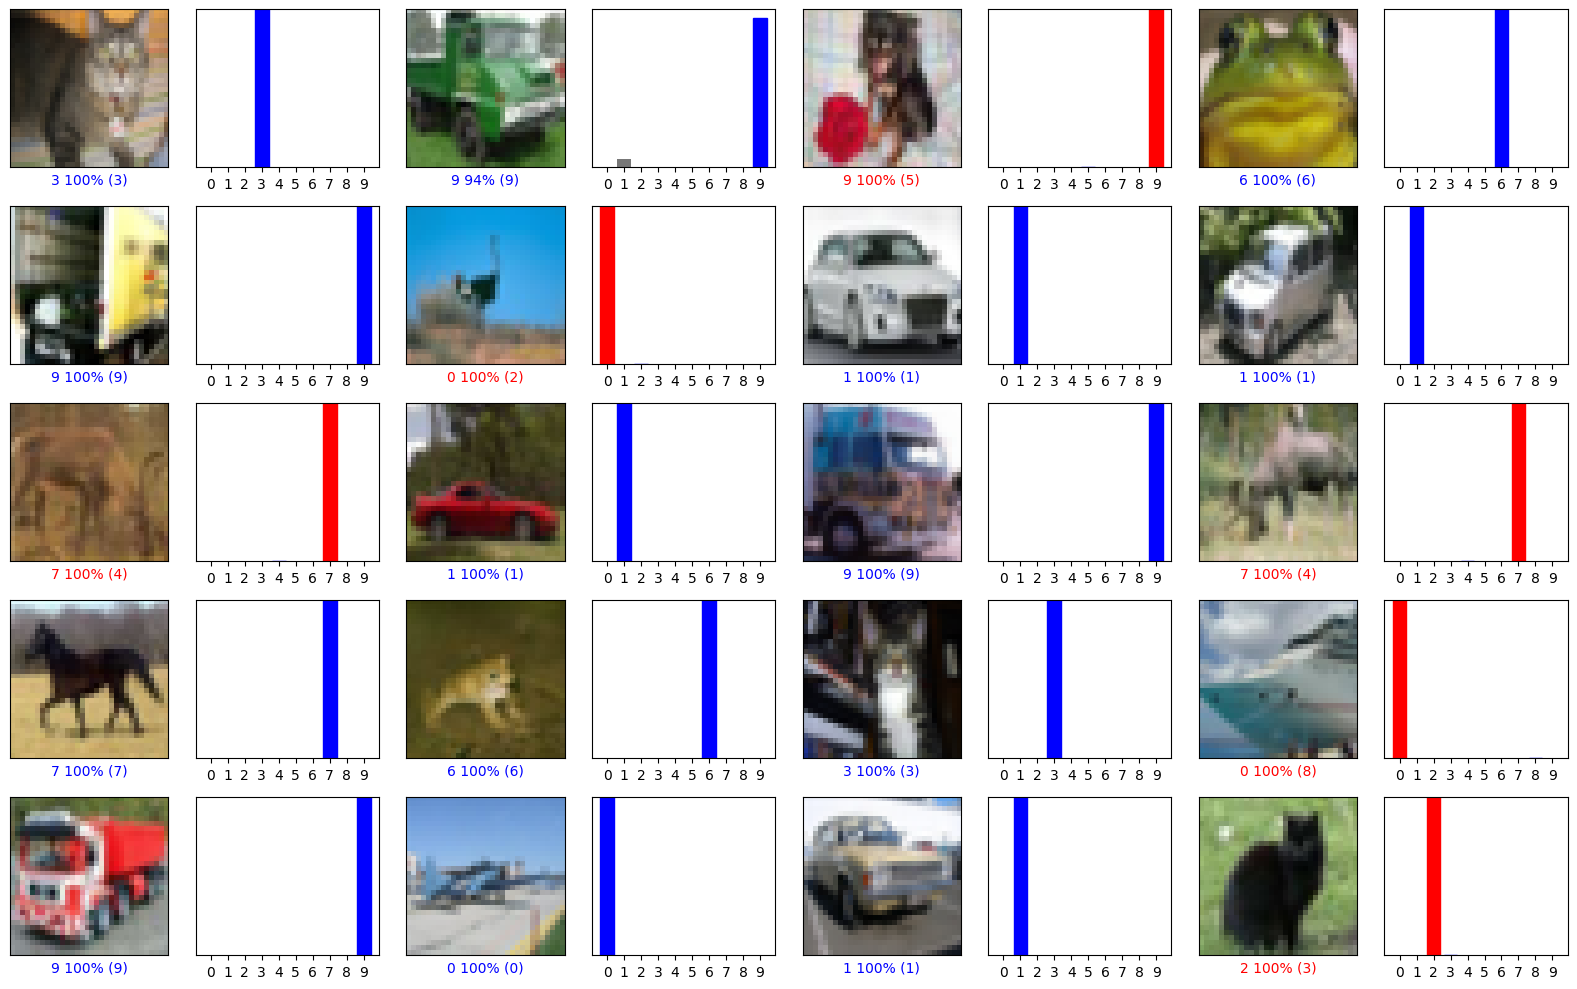

In [ ]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+start, predictions[i+start], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. Guardamos el modelo para futuras evaluaciones

Id cambiando los nombres del archivo para ir guardando los diversos proyectos.
Aquí lo guardamos en "local", pero recordad que lo ideal es que lo guardeis en Google Drive (teneis que montar la unidad, fijar la ruta y allí guardar el modelo .h5)

In [ ]:
ruta_googledrive = "/content/drive/MyDrive/" # A revisar en vuestra instancia

model.save(ruta_googledrive+'cifar10_base_model.h5')